This notebook uses the packages __pandas__(loads datasets and output tables), __numpy__(label formatting) and __matplotlib__(contains module for plotting graphs). In this project, the datasets used are the __gissette__, __madelon__ and __dexter__ datasets. The folders containing the three datasets must be in the same directory as this notebook. 

In order to run the code for this project, the following packages must be imported first

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

The style and size used for graph and fonts were found in:
https://www.kdnuggets.com/2019/04/data-visualization-python-matplotlib-seaborn.html

In [2]:
# style and size for graph fonts
fontdict_title = {'fontsize': 24, 'weight': 'bold', 'horizontalalignment': 'center'}
fontdict_xlabel = {'fontsize': 18, 'weight': 'bold', 'horizontalalignment': 'center'}
fontdict_ylabel = {'fontsize': 16, 'weight': 'bold', 'horizontalalignment': 'center', 'verticalalignment': 'baseline'}

Helper functions defined below are part of tisp logistic regression algorithm. ___sigmoid___ applies the sigmoid function to a numpy array. ___hard_thresholding_penalty___ applies the tisp threshold. ___prediction___ returns a numpy array of the same size as the input numpy array with values assigned according to the threshold: assigns 1 if the value is more than or equal to 0.5 otherwise, 0. ___misclassification_error___ calculates the mean misclassification error by comparing the values predicted with the actual labels and counting how many were incorrectly misclassified. The output of this function is then _amount of misclassifications/amount of classifications_. __feature_count__ returns true if the the number of features matches _threshold+bound_. Finally, ___normalize___ normalizes a dataset.

In [3]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def prediction(probabilities, threshold=0.5):
    return np.where(probabilities >= threshold, 1, 0)


def misclassification_error(predictions, labels):
    return np.where(predictions != labels, 1, 0).mean()


def normalize(m, std, data):
    return (data - m) / std


def hard_thresholding_penalty(w, learning_rate):
    return np.where(np.absolute(w) > learning_rate, w, 0)


def feature_count(it, weights, threshold):
    count = np.count_nonzero(weights)
    bounds = 10 if threshold > 10 else 5
    if threshold >= 300:
        bounds = 75
    if threshold == 100:
        bounds = 35
    if count in list(range(threshold - bounds, threshold + bounds + 1)):
        return True

Function for the logistic regression algorithm. This function returns the mean classification error for the training, all the loss values and the last updated weights after all the iterations. The intercept is set to 0.

In [4]:
def tisp_classifier(features, labels, learning_rate, iterations, shrinkage=0.0001):
    weights = np.zeros(features.shape[1])
    observation_num = features.shape[0]
    misclassification_errors = {}
    feature_num = [10, 30, 100, 300, 500]

    for iteration in range(1, iterations + 1):
        scores = np.dot(features, weights)
        probs = sigmoid(scores)
        pred = prediction(probs)
        error = misclassification_error(labels, pred)

        # Calculate gradient
        gradient = np.dot(features.T, labels - probs) / observation_num

        # Update weights
        weights = hard_thresholding_penalty(weights + gradient, learning_rate)

        for num in feature_num:
            if feature_count(iteration, weights, num):
                misclassification_errors[num] = error

    return misclassification_errors, weights

# Problem 1: TISP Logistic Regression: Gisette Dataset

Load training and test set

In [5]:
gisette_train_data = pd.read_csv("./Gisette/gisette_train.data", header=None, sep=" ").dropna(axis=1).values
gisette_train_labels = np.where(np.ravel(
    pd.read_csv("./Gisette/gisette_train.labels", header=None, sep=" ").dropna(axis=1).values) == -1, 0, 1)
gisette_test_data = pd.read_csv("./Gisette/gisette_valid.data", header=None, sep=" ").dropna(axis=1).values
gisette_test_labels = np.where(np.ravel(
    pd.read_csv("./Gisette/gisette_valid.labels", header=None, sep=" ").dropna(axis=1).values) == -1, 0, 1)

Normalize training and test set

In [6]:
gisette_train_data_mean = gisette_train_data.mean(axis=0)
gisette_train_data_std = np.where(gisette_train_data.std(axis=0) == 0, 1, gisette_train_data.std(axis=0))
normalized_gisette_train_data = normalize(gisette_train_data_mean, gisette_train_data_std, gisette_train_data)
normalized_gisette_test_data = normalize(gisette_train_data_mean, gisette_train_data_std, gisette_test_data)

Set iterations and learning rates in decreasing order of features obtained.

In [7]:
iters = 100
gisette_learning_train_rates = [0.04, 0.06, 0.09, 0.14, 0.2]

Run logistic regression and store the train error and weights

In [8]:
gisette_train_errors = [0 for x in range(0,5)]

gisette_train_errors[0], gisette_train_weights500 = tisp_classifier(normalized_gisette_train_data,
                                                                    gisette_train_labels,
                                                                    gisette_learning_train_rates[0],
                                                                    iters)

gisette_train_errors[1], gisette_train_weights300 = tisp_classifier(normalized_gisette_train_data,
                                                                    gisette_train_labels,
                                                                    gisette_learning_train_rates[1],
                                                                    iters)
gisette_train_errors[2], gisette_train_weights100 = tisp_classifier(normalized_gisette_train_data,
                                                                    gisette_train_labels,
                                                                    gisette_learning_train_rates[2],
                                                                    iters)

gisette_train_errors[3], gisette_train_weights30 = tisp_classifier(normalized_gisette_train_data,
                                                                   gisette_train_labels,
                                                                   gisette_learning_train_rates[3],
                                                                   iters)

gisette_train_errors[4], gisette_train_weights10 = tisp_classifier(normalized_gisette_train_data,
                                                                   gisette_train_labels,
                                                                   gisette_learning_train_rates[4],
                                                                   iters)

gisette_train_errors[0] = gisette_train_errors[0][500]
gisette_train_errors[1] = gisette_train_errors[1][300]
gisette_train_errors[2] = gisette_train_errors[2][100]
gisette_train_errors[3] = gisette_train_errors[3][30]
gisette_train_errors[4] = gisette_train_errors[4][10]

Predict using the test set and calculate the test error

In [9]:
gisette_test_errors = []
gisette_test_scores500 = np.dot(normalized_gisette_test_data, gisette_train_weights500)
gisette_test_preds500 = prediction(sigmoid(gisette_test_scores500))
gisette_test_errors.append(misclassification_error(gisette_test_labels, gisette_test_preds500))

gisette_test_scores300 = np.dot(normalized_gisette_test_data, gisette_train_weights300)
gisette_test_preds300 = prediction(sigmoid(gisette_test_scores300))
gisette_test_errors.append(misclassification_error(gisette_test_labels, gisette_test_preds300))

gisette_test_scores100 = np.dot(normalized_gisette_test_data, gisette_train_weights100)
gisette_test_preds100 = prediction(sigmoid(gisette_test_scores100))
gisette_test_errors.append(misclassification_error(gisette_test_labels, gisette_test_preds100))

gisette_test_scores30 = np.dot(normalized_gisette_test_data, gisette_train_weights30)
gisette_test_preds30 = prediction(sigmoid(gisette_test_scores30))
gisette_test_errors.append(misclassification_error(gisette_test_labels, gisette_test_preds30))

gisette_test_scores10 = np.dot(normalized_gisette_test_data, gisette_train_weights10)
gisette_test_preds10 = prediction(sigmoid(gisette_test_scores10))
gisette_test_errors.append(misclassification_error(gisette_test_labels, gisette_test_preds10))

Creates figure object. This is in its own cell so that the plots appear in the correct size.

In [10]:
fig = plt.figure();

<Figure size 432x288 with 0 Axes>

Plot a graph of number of features vs error

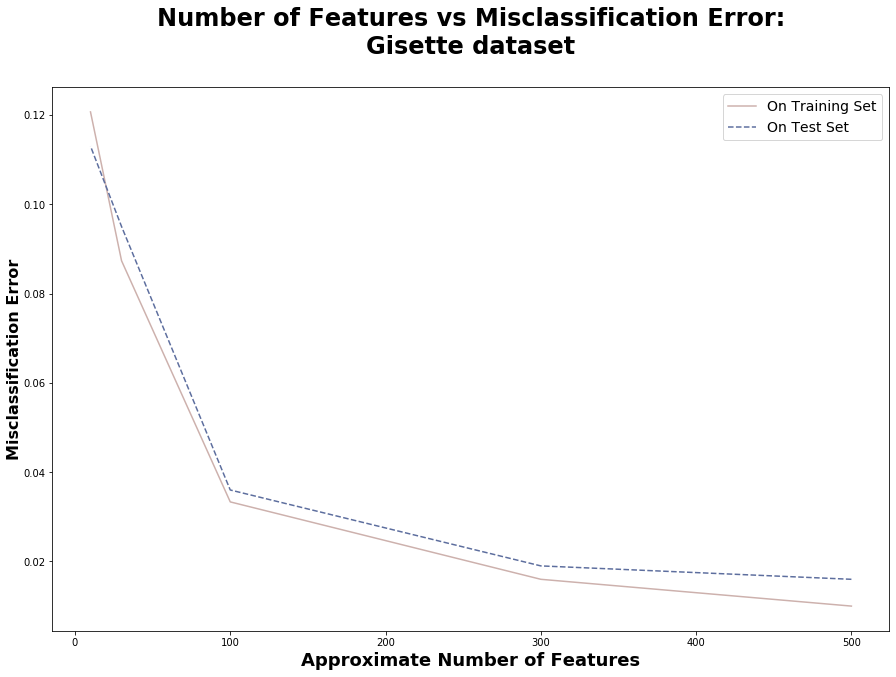

In [11]:
# size of graph
plt.rcParams['figure.figsize'] = [15, 10]  # size=15x10 inches

# labels
plt.title("Number of Features vs Misclassification Error:\nGisette dataset\n", fontdict=fontdict_title)
plt.xlabel("Approximate Number of Features", fontdict=fontdict_xlabel)
plt.ylabel("Misclassification Error", fontdict=fontdict_ylabel)

# plotting
features_approximately = [500,300,100,30,10]
plt.plot(features_approximately, gisette_train_errors,
         color="#CDB1AD",
         linestyle="-",
         label="On Training Set")
plt.plot(features_approximately, gisette_test_errors,
         color="#5D6E9E",
         linestyle="--",
         label="On Test Set")
plt.legend(fontsize=14);

## Train and Test Misclassification Errors Table

In [12]:
# Create labels
rows_labels = gisette_learning_train_rates
columns_labels = ["Lambda Value","Gisette Train Error","Gisette Test Error"," Approximate Number of Features"]

# Store the misclassification error from each dataset for training and testing
misclassification_errors = {
    columns_labels[1]: gisette_train_errors,
    columns_labels[2]: gisette_test_errors,
    columns_labels[3]: features_approximately
}

# Create dataframe to output table
error_tabledf=pd.DataFrame(misclassification_errors, index=rows_labels)
error_tabledf.index.name = columns_labels[0]
error_tabledf

,Gisette Train Error,Gisette Test Error,Approximate Number of Features
Lambda Value,,,
0.04,0.010000,0.016,500
0.06,0.016000,0.019,300
0.09,0.033333,0.036,100
0.14,0.087333,0.095,30
0.20,0.120667,0.113,10


# Problem 2: Logistic Regression: Dexter Dataset

Create csv files from __dexter_train.data__ and __dexter_test.data__ in order to load it with pandas.

In [13]:
def reformat_file(input_filepath, output_filepath, row_num, col_num):
    output_file = open(output_filepath, "w+")
    with open(input_filepath, "r") as fp:
        for obs in range(0, row_num):
            line = fp.readline()
            strs = line.split(" ")
            output_line = ["0" for col in range(0, col_num)]

            for s in strs:
                if s != "\n":
                    i, value = s.split(":")
                    output_line[int(i)] = value

            output_file.write(",".join(output_line) + "\n")

    output_file.close()

reformat_file("./dexter/dexter_train.data", "./dexter/dexter_train.csv", 300, 20000)
reformat_file("./dexter/dexter_valid.data", "./dexter/dexter_valid.csv", 300, 20000)

Load training and test set

In [14]:
dexter_train_data = pd.read_csv("./dexter/dexter_train.csv", header=None).values
dexter_train_labels = np.where(np.ravel(pd.read_csv("./dexter/dexter_train.labels", header=None).values) == -1, 0, 1)
dexter_test_data = pd.read_csv("./dexter/dexter_valid.csv", header=None).values
dexter_test_labels = np.where(np.ravel(pd.read_csv("./dexter/dexter_valid.labels", header=None).values) == -1, 0, 1)

Normalize training and test set

In [15]:
dexter_train_data_mean = dexter_train_data.mean(axis=0)
dexter_train_data_std = np.where(dexter_train_data.std(axis=0) == 0, 1, dexter_train_data.std(axis=0))
normalized_dexter_train_data = normalize(dexter_train_data_mean, dexter_train_data_std, dexter_train_data)
normalized_dexter_test_data = normalize(dexter_train_data_mean, dexter_train_data_std, dexter_test_data)

Set iterations and learning rates in decreasing order of features obtained.

In [16]:
iters = 100
dexter_learning_train_rates = [0.049, 0.057, 0.07, 0.11, 0.14]

Run logistic regression and store the train error and weights

In [17]:
dexter_train_errors = [0, 0, 0, 0, 0]

dexter_train_errors[0], dexter_train_weights500 = tisp_classifier(normalized_dexter_train_data,
                                                                  dexter_train_labels,
                                                                  dexter_learning_train_rates[0],
                                                                  iters)

dexter_train_errors[1], dexter_train_weights300 = tisp_classifier(normalized_dexter_train_data,
                                                                  dexter_train_labels,
                                                                  dexter_learning_train_rates[1],
                                                                  iters)

dexter_train_errors[2], dexter_train_weights100 = tisp_classifier(normalized_dexter_train_data,
                                                                  dexter_train_labels,
                                                                  dexter_learning_train_rates[2],
                                                                  iters)


dexter_train_errors[3], dexter_train_weights30 = tisp_classifier(normalized_dexter_train_data,
                                                                 dexter_train_labels,
                                                                 dexter_learning_train_rates[3],
                                                                 iters)

dexter_train_errors[4], dexter_train_weights10 = tisp_classifier(normalized_dexter_train_data,
                                                                 dexter_train_labels,
                                                                 dexter_learning_train_rates[4],
                                                                 iters)

dexter_train_errors[0] = dexter_train_errors[0][500]
dexter_train_errors[1] = dexter_train_errors[1][300]
dexter_train_errors[2] = dexter_train_errors[2][100]
dexter_train_errors[3] = dexter_train_errors[3][30]
dexter_train_errors[4] = dexter_train_errors[4][10]

Predict using the test set and calculate the test error

In [18]:
dexter_test_errors = []
dexter_test_scores500 = np.dot(normalized_dexter_test_data, dexter_train_weights500)
dexter_test_preds500 = prediction(sigmoid(dexter_test_scores500))
dexter_test_errors.append(misclassification_error(dexter_test_labels, dexter_test_preds500))

dexter_test_scores300 = np.dot(normalized_dexter_test_data, dexter_train_weights300)
dexter_test_preds300 = prediction(sigmoid(dexter_test_scores300))
dexter_test_errors.append(misclassification_error(dexter_test_labels, dexter_test_preds300))

dexter_test_scores100 = np.dot(normalized_dexter_test_data, dexter_train_weights100)
dexter_test_preds100 = prediction(sigmoid(dexter_test_scores100))
dexter_test_errors.append(misclassification_error(dexter_test_labels, dexter_test_preds100))

dexter_test_scores30 = np.dot(normalized_dexter_test_data, dexter_train_weights30)
dexter_test_preds30 = prediction(sigmoid(dexter_test_scores30))
dexter_test_errors.append(misclassification_error(dexter_test_labels, dexter_test_preds30))

dexter_test_scores10 = np.dot(normalized_dexter_test_data, dexter_train_weights10)
dexter_test_preds10 = prediction(sigmoid(dexter_test_scores10))
dexter_test_errors.append(misclassification_error(dexter_test_labels, dexter_test_preds10))

Plot a graph of number of features vs error

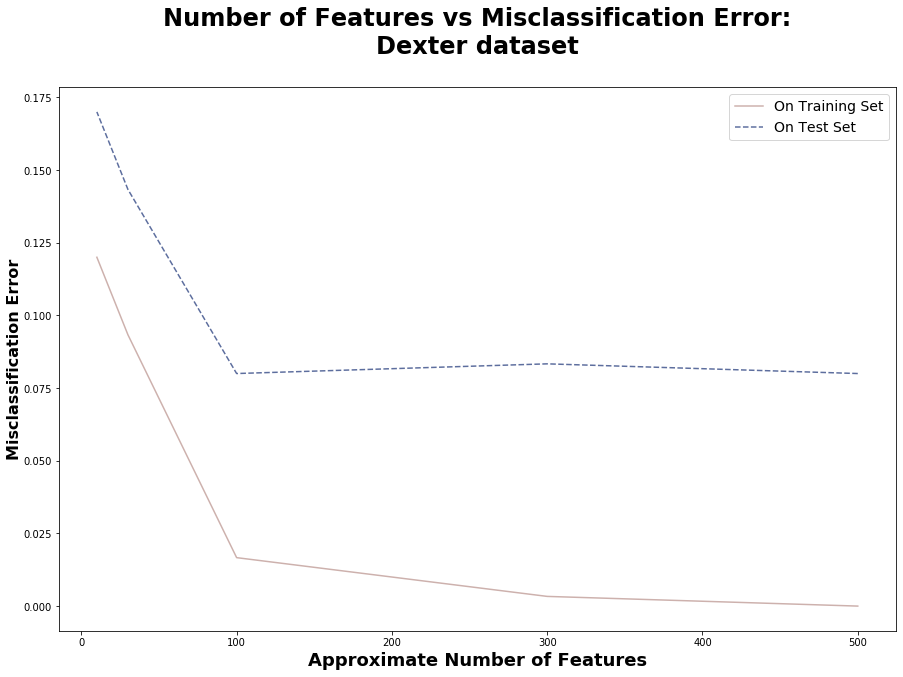

In [19]:
# size of graph
plt.rcParams['figure.figsize'] = [15, 10]  # size=15x10 inches

# labels
plt.title("Number of Features vs Misclassification Error:\nDexter dataset\n", fontdict=fontdict_title)
plt.xlabel("Approximate Number of Features", fontdict=fontdict_xlabel)
plt.ylabel("Misclassification Error", fontdict=fontdict_ylabel)

# plotting
features_approximately = [500,300,100,30,10]
plt.plot(features_approximately, dexter_train_errors,
         color="#CDB1AD",
         linestyle="-",
         label="On Training Set")
plt.plot(features_approximately, dexter_test_errors,
         color="#5D6E9E",
         linestyle="--",
         label="On Test Set")
plt.legend(fontsize=14);

## Train and Test Misclassification Errors Table

In [20]:
# Create labels
rows_labels = dexter_learning_train_rates
columns_labels = ["Lambda Value","Dexter Train Error","Dexter Test Error"," Approximate Number of Features"]

# Store the misclassification error from each dataset for training and testing
misclassification_errors = {
    columns_labels[1]: dexter_train_errors,
    columns_labels[2]: dexter_test_errors,
    columns_labels[3]: features_approximately
}

# Create dataframe to output table
error_tabledf=pd.DataFrame(misclassification_errors, index=rows_labels)
error_tabledf.index.name = columns_labels[0]
error_tabledf

,Dexter Train Error,Dexter Test Error,Approximate Number of Features
Lambda Value,,,
0.049,0.000000,0.080000,500
0.057,0.003333,0.083333,300
0.070,0.016667,0.080000,100
0.110,0.093333,0.143333,30
0.140,0.120000,0.170000,10


# Problem 3: TISP Logistic Regression: Madelon Dataset

Load training and test set

In [21]:
madelon_train_data = pd.read_csv("./madelon/madelon_train.data", header=None, sep=" ").dropna(axis=1).values
madelon_train_labels = np.where(np.ravel(
    pd.read_csv("./madelon/madelon_train.labels", header=None, sep=" ").dropna(axis=1).values) == -1, 0, 1)

madelon_test_data = pd.read_csv("./madelon/madelon_valid.data", header=None, sep=" ").dropna(axis=1).values

madelon_test_labels = np.where(np.ravel(
    pd.read_csv("./madelon/madelon_valid.labels", header=None, sep=" ").dropna(axis=1).values) == -1, 0, 1)

Normalize training and test set

In [22]:
madelon_train_data_mean = madelon_train_data.mean(axis=0)
madelon_train_data_std = np.where(madelon_train_data.std(axis=0) == 0, 1, madelon_train_data.std(axis=0))
normalized_madelon_train_data = normalize(madelon_train_data_mean, madelon_train_data_std, madelon_train_data)
normalized_madelon_test_data = normalize(madelon_train_data_mean, madelon_train_data_std, madelon_test_data)

Set learning rate and iterations

In [23]:
iters = 100

madelon_learning_train_rates = [0.001, 0.007, 0.015, 0.025, 0.04]

Run logistic regression and store the train error and weights

In [24]:
madelon_train_errors = [0, 0, 0, 0, 0]

madelon_train_errors[0], madelon_train_weights500 = tisp_classifier(normalized_madelon_train_data,
                                                                    madelon_train_labels,
                                                                    madelon_learning_train_rates[0],
                                                                    iters)

madelon_train_errors[1], madelon_train_weights300 = tisp_classifier(normalized_madelon_train_data,
                                                                    madelon_train_labels,
                                                                    madelon_learning_train_rates[1],
                                                                    iters)

madelon_train_errors[2], madelon_train_weights100 = tisp_classifier(normalized_madelon_train_data,
                                                                    madelon_train_labels,
                                                                    madelon_learning_train_rates[2],
                                                                    iters)

madelon_train_errors[3], madelon_train_weights30 = tisp_classifier(normalized_madelon_train_data,
                                                                   madelon_train_labels,
                                                                   madelon_learning_train_rates[3],
                                                                   iters)

madelon_train_errors[4], madelon_train_weights10 = tisp_classifier(normalized_madelon_train_data,
                                                                   madelon_train_labels,
                                                                   madelon_learning_train_rates[4],
                                                                   iters)

madelon_train_errors[0] = madelon_train_errors[0][500]
madelon_train_errors[1] = madelon_train_errors[1][300]
madelon_train_errors[2] = madelon_train_errors[2][100]
madelon_train_errors[3] = madelon_train_errors[3][30]
madelon_train_errors[4] = madelon_train_errors[4][10]

Predict using the test set and calculate the test error

In [25]:
madelon_test_errors = []
madelon_test_scores500 = np.dot(normalized_madelon_test_data, madelon_train_weights500)
madelon_test_preds500 = prediction(sigmoid(madelon_test_scores500))
madelon_test_errors.append(misclassification_error(madelon_test_labels, madelon_test_preds500))

madelon_test_scores300 = np.dot(normalized_madelon_test_data, madelon_train_weights300)
madelon_test_preds300 = prediction(sigmoid(madelon_test_scores300))
madelon_test_errors.append(misclassification_error(madelon_test_labels, madelon_test_preds300))

madelon_test_scores100 = np.dot(normalized_madelon_test_data, madelon_train_weights100)
madelon_test_preds100 = prediction(sigmoid(madelon_test_scores100))
madelon_test_errors.append(misclassification_error(madelon_test_labels, madelon_test_preds100))

madelon_test_scores30 = np.dot(normalized_madelon_test_data, madelon_train_weights30)
madelon_test_preds30 = prediction(sigmoid(madelon_test_scores30))
madelon_test_errors.append(misclassification_error(madelon_test_labels, madelon_test_preds30))

madelon_test_scores10 = np.dot(normalized_madelon_test_data, madelon_train_weights10)
madelon_test_preds10 = prediction(sigmoid(madelon_test_scores10))
madelon_test_errors.append(misclassification_error(madelon_test_labels, madelon_test_preds10))

Plot a graph of number of features vs error

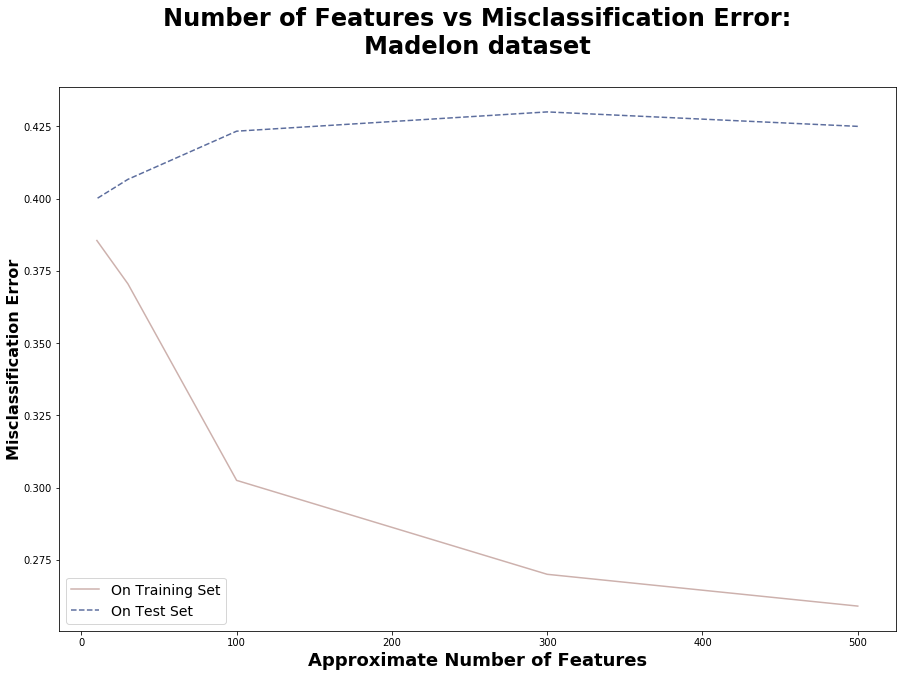

In [26]:
# size of graph
plt.rcParams['figure.figsize'] = [15, 10]  # size=15x10 inches

# labels
plt.title("Number of Features vs Misclassification Error:\nMadelon dataset\n", fontdict=fontdict_title)
plt.xlabel("Approximate Number of Features", fontdict=fontdict_xlabel)
plt.ylabel("Misclassification Error", fontdict=fontdict_ylabel)

# plotting
features_approximately = [500,300,100,30,10]
plt.plot(features_approximately, madelon_train_errors,
         color="#CDB1AD",
         linestyle="-",
         label="On Training Set")
plt.plot(features_approximately, madelon_test_errors,
         color="#5D6E9E",
         linestyle="--",
         label="On Test Set")
plt.legend(fontsize=14);

## Train and Test Misclassification Errors

In [27]:
# Create labels
rows_labels = gisette_learning_train_rates
columns_labels = ["Lambda Value","Madelon Train Error","Madelon Test Error"," Approximate Number of Features"]

# Store the misclassification error from each dataset for training and testing
misclassification_errors = {
    columns_labels[1]: madelon_train_errors,
    columns_labels[2]: madelon_test_errors,
    columns_labels[3]: features_approximately
}

# Create dataframe to output table
error_tabledf=pd.DataFrame(misclassification_errors, index=rows_labels)
error_tabledf.index.name = columns_labels[0]
error_tabledf

,Madelon Train Error,Madelon Test Error,Approximate Number of Features
Lambda Value,,,
0.04,0.2590,0.425000,500
0.06,0.2700,0.430000,300
0.09,0.3025,0.423333,100
0.14,0.3705,0.406667,30
0.20,0.3855,0.400000,10
